In [49]:
import pandas as pd

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [51]:
import csv

with open('BTC-USD.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
       print(row)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2020-06-21', '9330.926758', '9401.107422', '9300.430664', '9303.629883', '9303.629883', '15324301169']
['2020-06-22', '9300.915039', '9655.073242', '9296.872070', '9648.717773', '9648.717773', '21104009514']
['2020-06-23', '9644.076172', '9670.541016', '9547.247070', '9629.658203', '9629.658203', '17006433272']
['2020-06-24', '9632.149414', '9680.367188', '9278.233398', '9313.610352', '9313.610352', '18961716076']
['2020-06-25', '9314.126953', '9340.161133', '9095.324219', '9264.813477', '9264.813477', '18616048626']
['2020-06-26', '9260.995117', '9310.516602', '9101.738281', '9162.917969', '9162.917969', '18341465837']
['2020-06-27', '9167.824219', '9207.810547', '8998.216797', '9045.390625', '9045.390625', '17273093144']
['2020-06-28', '9048.460938', '9197.546875', '8975.525391', '9143.582031', '9143.582031', '14560870760']
['2020-06-29', '9140.029297', '9237.573242', '9041.875977', '9190.854492', '9190.854492', '16460

In [52]:
sample_data = pd.read_csv('BTC-USD.csv')

In [53]:
sample_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,9303.629883,1.532430e+10
1,2020-06-22,9300.915039,9655.073242,9296.872070,9648.717773,9648.717773,2.110401e+10
2,2020-06-23,9644.076172,9670.541016,9547.247070,9629.658203,9629.658203,1.700643e+10
3,2020-06-24,9632.149414,9680.367188,9278.233398,9313.610352,9313.610352,1.896172e+10
4,2020-06-25,9314.126953,9340.161133,9095.324219,9264.813477,9264.813477,1.861605e+10
...,...,...,...,...,...,...,...
361,2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,3.709667e+10
362,2021-06-18,38099.476563,38187.261719,35255.855469,35787.246094,35787.246094,3.620089e+10
363,2021-06-19,35854.527344,36457.796875,34933.062500,35615.871094,35615.871094,3.120728e+10
364,2021-06-20,35563.140625,36059.484375,33432.074219,35698.296875,35698.296875,3.666403e+10


In [54]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,3.709667e+10
362,2021-06-18,38099.476563,38187.261719,35255.855469,35787.246094,35787.246094,3.620089e+10
363,2021-06-19,35854.527344,36457.796875,34933.062500,35615.871094,35615.871094,3.120728e+10
364,2021-06-20,35563.140625,36059.484375,33432.074219,35698.296875,35698.296875,3.666403e+10
365,2021-06-21,35687.859375,35687.859375,31603.417969,31676.349609,31676.349609,4.997734e+10


In [55]:
data_training = data[data['Date']< '2021-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,9303.629883,1.532430e+10
1,2020-06-22,9300.915039,9655.073242,9296.872070,9648.717773,9648.717773,2.110401e+10
2,2020-06-23,9644.076172,9670.541016,9547.247070,9629.658203,9629.658203,1.700643e+10
3,2020-06-24,9632.149414,9680.367188,9278.233398,9313.610352,9313.610352,1.896172e+10
4,2020-06-25,9314.126953,9340.161133,9095.324219,9264.813477,9264.813477,1.861605e+10
...,...,...,...,...,...,...,...
189,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,6.647990e+10
190,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,4.905674e+10
191,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,4.526595e+10
192,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,5.128744e+10


In [56]:
 training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
 training_data.head()

,Open,High,Low,Close,Volume
0,9330.926758,9401.107422,9300.430664,9303.629883,1.532430e+10
1,9300.915039,9655.073242,9296.872070,9648.717773,2.110401e+10
2,9644.076172,9670.541016,9547.247070,9629.658203,1.700643e+10
3,9632.149414,9680.367188,9278.233398,9313.610352,1.896172e+10
4,9314.126953,9340.161133,9095.324219,9264.813477,1.861605e+10


In [57]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data


array([[1.42709141e-02, 1.18970013e-02, 1.68988549e-02, 1.29402178e-02,
        5.19517545e-02],
       [1.27546434e-02, 2.45430052e-02, 1.67137666e-02, 3.02323697e-02,
        1.49704145e-01],
       [3.00920439e-02, 2.53132094e-02, 2.97361801e-02, 2.92773058e-02,
        8.04017083e-02],
       [2.94894728e-02, 2.58024950e-02, 1.57443388e-02, 1.34403333e-02,
        1.13471468e-01],
       [1.34221439e-02, 8.86223455e-03, 6.23093308e-03, 1.09951505e-02,
        1.07625184e-01],
       [1.07377842e-02, 7.38611128e-03, 6.56453894e-03, 5.88922630e-03,
        1.02981156e-01],
       [6.03054604e-03, 2.27195388e-03, 1.18021716e-03, 0.00000000e+00,
        8.49117352e-02],
       [0.00000000e+00, 1.76088338e-03, 0.00000000e+00, 4.92031379e-03,
        3.90398318e-02],
       [4.62627368e-03, 3.75396102e-03, 3.45100255e-03, 7.28910909e-03,
        7.11691177e-02],
       [6.92766797e-03, 2.77115938e-03, 5.68552200e-03, 4.64025894e-03,
        5.89114092e-02],
       [4.92718920e-03, 7.3481

In [58]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
     X_train.append(training_data[i-60:i])
     Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(134, 60, 5)

In [67]:
from tensorflow.keras import Sequential

In [68]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN

In [91]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [92]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[0], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 1, 50)             11200     
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 1, 60)             26640     
_________________________________________________________________
dropout_29 (Dropout)         (None, 1, 60)             0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 1, 80)             45120     
_________________________________________________________________
dropout_30 (Dropout)         (None, 1, 80)             0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 120)             

In [94]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [98]:
model.fit(X_train, batch_size=128, epochs=NUM_EPOCHS, validation_data=(validation_inputs,validation_targets))

NameError: name 'NUM_EPOCHS' is not defined

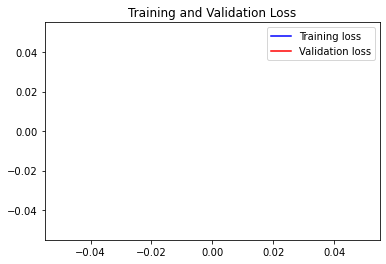

In [34]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()